In [61]:
install.packages("gdata")
install.packages("lattice")
install.packages("ggplot2")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [62]:
library(gdata)
library(lattice)
library(ggplot2)

In [64]:
xldata = read.xls("/Users/mitalibhiwande/Desktop/Lab3_mitalivi/NHLTop100.xlsx")

In [65]:
head(xldata)

Rank,Player,Team,Pos,X1st.NHL.Season,Last.NHL.Season,GP,G,A,P,X...,PIM,PP,SH,GW,GT,OT,Shots
1,Wayne Gretzky,,C,1979-1980,1998-1999,1487,894,1963,2857,518,577,204,73,91,12,1,5089
2,Mark Messier,,C,1979-1980,2003-2004,1756,694,1193,1887,210,1910,179,63,92,15,7,4219
3,Gordie Howe,,R,1946-1947,1979-1980,1767,801,1049,1850,87,1685,39,5,18,NA,NA,NA
4,Ron Francis,,C,1981-1982,2003-2004,1731,549,1249,1798,-10,979,188,12,79,13,3,3754
5,Marcel Dionne,,C,1971-1972,1988-1989,1348,731,1040,1771,28,600,234,19,74,1,2,5366
6,Steve Yzerman,,C,1983-1984,2005-2006,1514,692,1063,1755,202,924,202,50,94,12,8,4602


In [66]:
goalAssist<-xldata[,c("G","A")]
colnames(goalAssist)<-c("Goal","Assist")
head(goalAssist)

Goal,Assist
894,1963
694,1193
801,1049
549,1249
731,1040
692,1063



Call:
lm(formula = goalAssist)

Residuals:
    Min      1Q  Median      3Q     Max 
-294.82  -83.50   10.12   88.54  284.69 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 321.08001   46.62860   6.886 5.52e-10 ***
Assist        0.20805    0.06033   3.449 0.000832 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 130.9 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


Assist 
0.208053

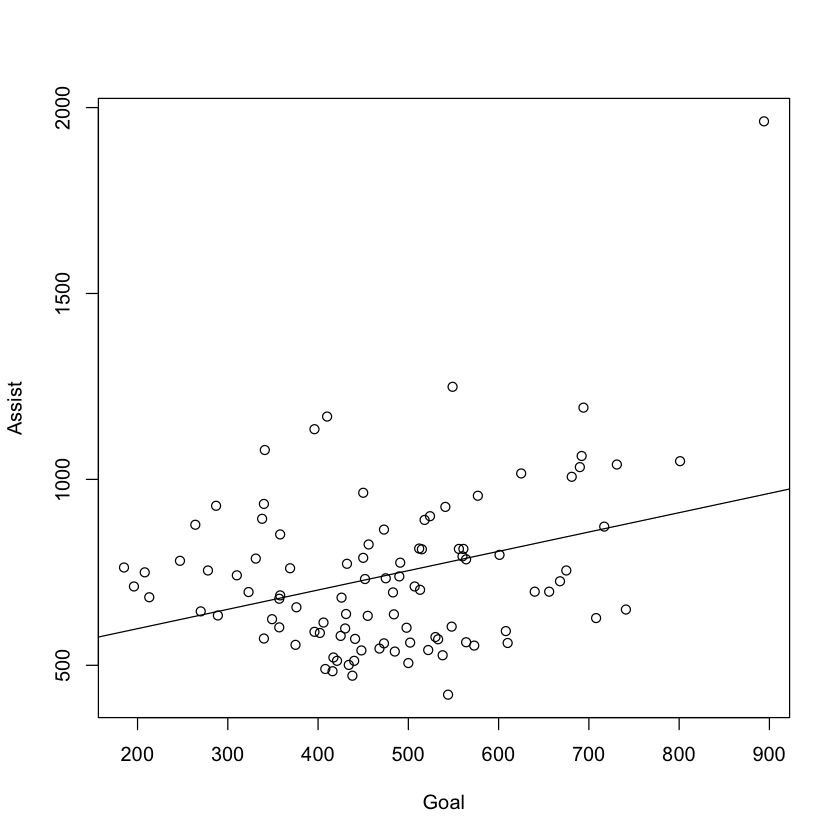

In [70]:
lmmodel<-lm(goalAssist)
summary(lmmodel)
plot(goalAssist,panel.first=abline(h=c(0,50),v=c(0,10),lty=3,col="red"))
abline(lm(Assist~Goal, data=goalAssist))


### Here to pass the line of the model through the points of wayne and Kane, we subtract the intercept from y axis and plot the respective abline with the intercept and slopes of Wayne and Kane's models.


Call:
lm(formula = I(Assist - coef(wayne)[1]) ~ I(Goal), data = goalAssist)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1497.9356    74.6410  20.069  < 2e-16 ***
I(Goal)        0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


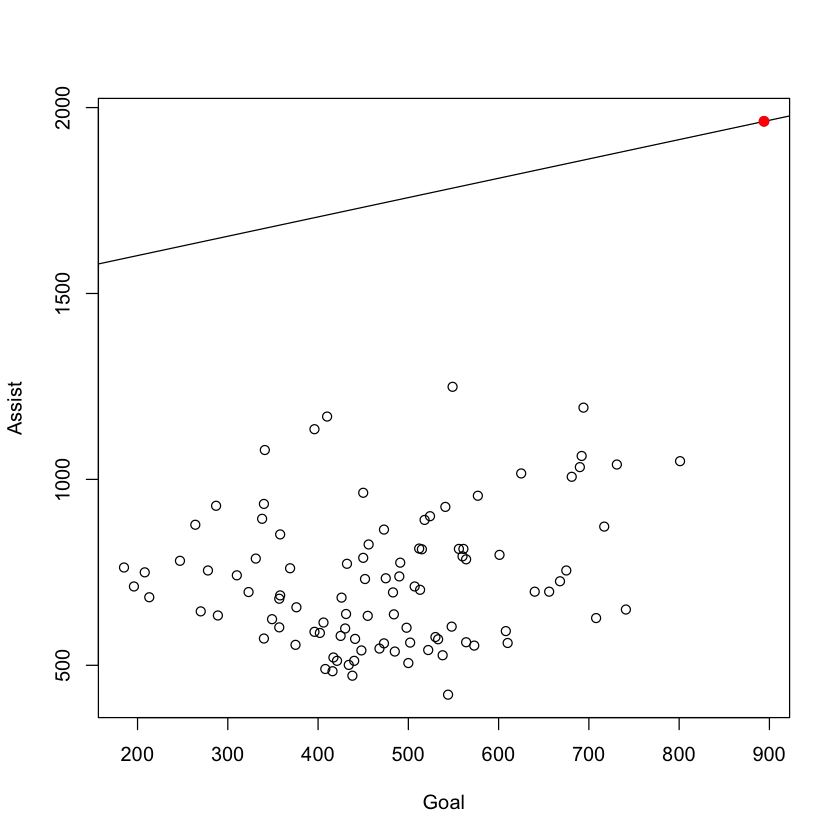

In [82]:
wayne<-(lm(I(Assist-1963)~I(Goal-894), data=goalAssist))
wayne1<- lm(I(Assist-coef(wayne)[1])~I(Goal), data=goalAssist)
summary(wayne1)
plot(goalAssist,panel.first=abline(h=c(0,50),v=c(0,10),lty=3))
abline(coef(wayne1)[1],coef(wayne1)[2])
points(x=894,y=1963, pch=20, col="red", cex=1.6)

### Initially we add the point of kane to data set and apply the same above method to pass the abline through his co-ordinates


Call:
lm(formula = I(Assist - coef(kane)[1]) ~ I(Goal), data = goalAssist)

Residuals:
    Min      1Q  Median      3Q     Max 
-355.97 -175.12   -8.92  126.23  997.75 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 308.6821    73.5982   4.194 5.97e-05 ***
I(Goal)       0.5380     0.1492   3.605 0.000491 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 206.8 on 99 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R-squared:  0.1071 
F-statistic:    13 on 1 and 99 DF,  p-value: 0.0004909


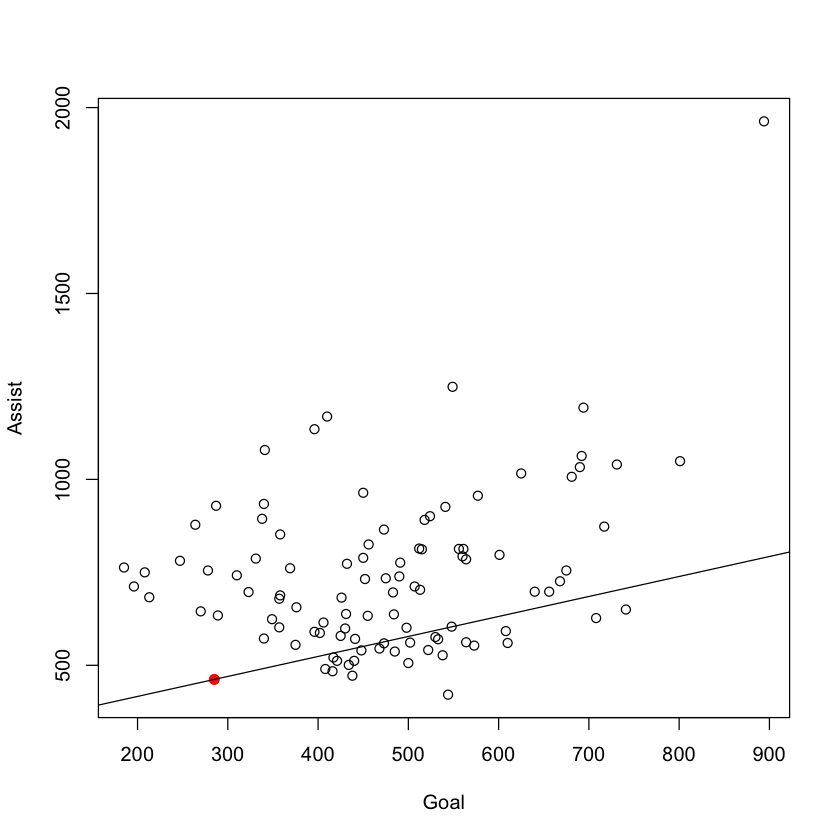

In [85]:
goalAssist<-rbind(goalAssist, c(285,462))
#print(goalAssist)
kane<-lm(lm(I(Assist-462)~I(Goal-285), data=goalAssist))
kane1<-lm(I(Assist-coef(kane)[1])~I(Goal), data=goalAssist)
summary(kane1)
plot(goalAssist,panel.first=abline(h=c(0,50),v=c(0,10),lty=3,col="red"))
points(x=285,y=462, pch=20, col="red", cex=1.6)
abline(coef(kane1)[1],coef(kane1)[2])

## To pass the ablines through the origins, we consider y=0, and the slope of line. We also note the r square and p values for the models passing through origin.


Call:
lm(formula = I(Assist) ~ I(Goal) + 0, data = goalAssist)

Residuals:
   Min     1Q Median     3Q    Max 
-447.3 -137.1    3.6  157.9  639.2 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
I(Goal)  1.48080    0.04976   29.76   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 246.7 on 100 degrees of freedom
Multiple R-squared:  0.8985,	Adjusted R-squared:  0.8975 
F-statistic: 885.4 on 1 and 100 DF,  p-value: < 2.2e-16



Call:
lm(formula = I(Assist - 1963) ~ I(Goal - 894) + 0, data = goalAssist)

Residuals:
   Min     1Q Median     3Q    Max 
-902.9 -329.7 -141.1  121.9  700.5 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
I(Goal - 894)  2.68054    0.08412   31.86   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 374.1 on 100 degrees of freedom
Multiple R-squared:  0.9103,	Adjusted R-squared:  0.9094 
F-statistic:  1015 on 1 and 100 DF,  p-value: < 2.2e-16



Call:
lm(formula = I(Assist - 462) ~ I(Goal - 285) + 0, data = goalAssist)

Residuals:
    Min      1Q  Median      3Q     Max 
-337.54 -112.83   40.72  167.42  803.74 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
I(Goal - 285)  1.14493    0.09825   11.65   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 230.6 on 100 degrees of freedom
Multiple R-squared:  0.5759,	Adjusted R-squared:  0.5717 
F-statistic: 135.8 on 1 and 100 DF,  p-value: < 2.2e-16


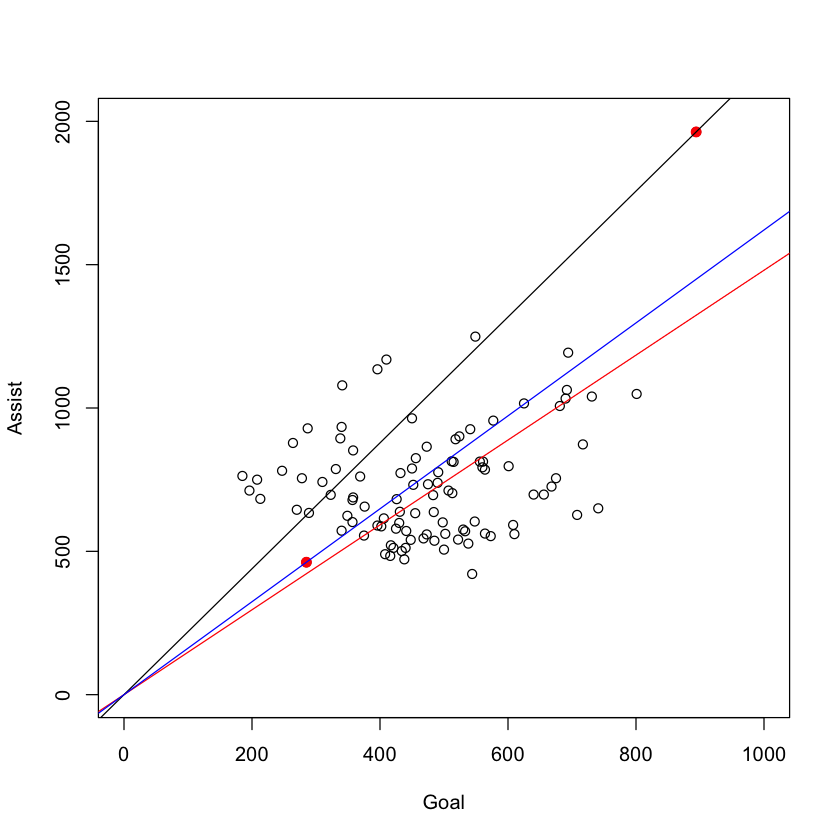

In [93]:
plot(Assist~Goal,goalAssist, ylim=c(0,2000), xlim=c(0,1000))
origin <- lm(I(Assist)~I(Goal)+0, goalAssist)
abline(origin, col="red")
originwayne <- lm(I(Assist-1963)~I(Goal-894)+0, goalAssist)
points(x=894,y=1963, pch=20, col="red", cex=1.6)
abline(0, 1963/894)
points(x=285,y=462, pch=20, col="red", cex=1.6)
abline(0,462/285, col="blue")
originkane <- lm(I(Assist-462)~I(Goal-285)+0, goalAssist)
summary(origin)
summary(originwayne)
summary(originkane)

In [98]:
ModelNames = c("Initial fit", "Wayne gretzky","Patrick kane", "Passing through origin","Passing through origin Wayne","Passing through origin Kane")
RsquaredValue = c("0.1082","0.1082", "0.116", "0.8985","0.9103","0.5759")
Pvalue = c("0.0008317", "0.0008317", "0.0004909", "2.2e-16","2.2e-16","2.2e-16")

df = data.frame(ModelNames, RsquaredValue, Pvalue)
df

ModelNames,RsquaredValue,Pvalue
Initial fit,0.1082,0.0008317
Wayne gretzky,0.1082,0.0008317
Patrick kane,0.116,0.0004909
Passing through origin,0.8985,2.2e-16
Passing through origin Wayne,0.9103,2.2e-16
Passing through origin Kane,0.5759,2.2e-16


# Interpretation:
### R-squared value for the intial fit is less. But when we force the regression line to pass through the origin this value increases.
### R-squared is a statistical measure of how close the data are to the fitted regression line. So greater r square, more fit the model is. 
### a small p-value for the intercept and the slope indicates that we can reject the null hypothesis.

# References: 
#### http://www.statmethods.net/stats/regression.html
#### http://www.ddiez.com/teac/r/linear_models.php
#### http://feliperego.github.io/blog/2015/10/23/Interpreting-Model-Output-In-R